In [2]:
from environment import NormalMoveEnv
from experiment import Experiment
from nn import BetaModel, Model, GeneralModel
from rl import Agent, Trajectory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# %matplotlib inline

# Env

<AxesSubplot: >

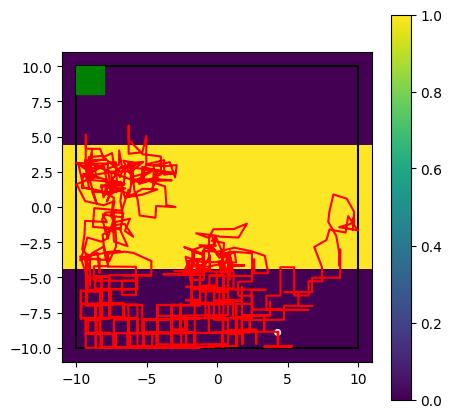

In [3]:
env_params= {
    # 'walls': [([-9.,-1.],[10., 1.])],
    'walls': [],
    'goals': [([-10.,8.],[-8.,10.])],
    'start': ([0.,-9.9],[9.9,-7.]),
    'beta': lambda s: (s[1]>-4. and s[1]<4.)
}

env = NormalMoveEnv(**env_params)
# env = NormalMoveEnv()

t = Trajectory(env, size=1_000)
t.plot(env.plot())

<AxesSubplot: >

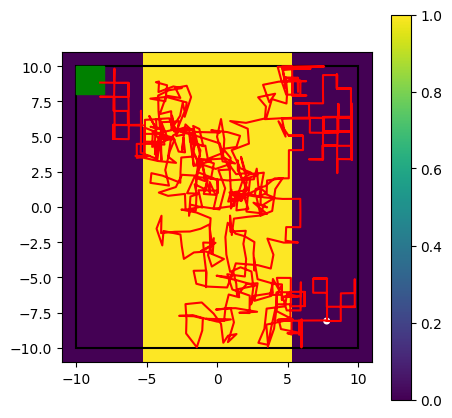

In [4]:
env2_params= {
    # 'walls': [([-9.,-1.],[10., 1.])],
    'walls': [],
    'goals': [([-10.,8.],[-8.,10.])],
    'start': ([0.,-9.9],[9.9,-7.]),
    'beta': lambda s: (s[0]>-5. and s[0]<5.)
}

env2 = NormalMoveEnv(**env2_params)
# env = NormalMoveEnv()

t = Trajectory(env2, size=1_000)
t.plot(env2.plot())

# K-Models

Trajectory size: 300


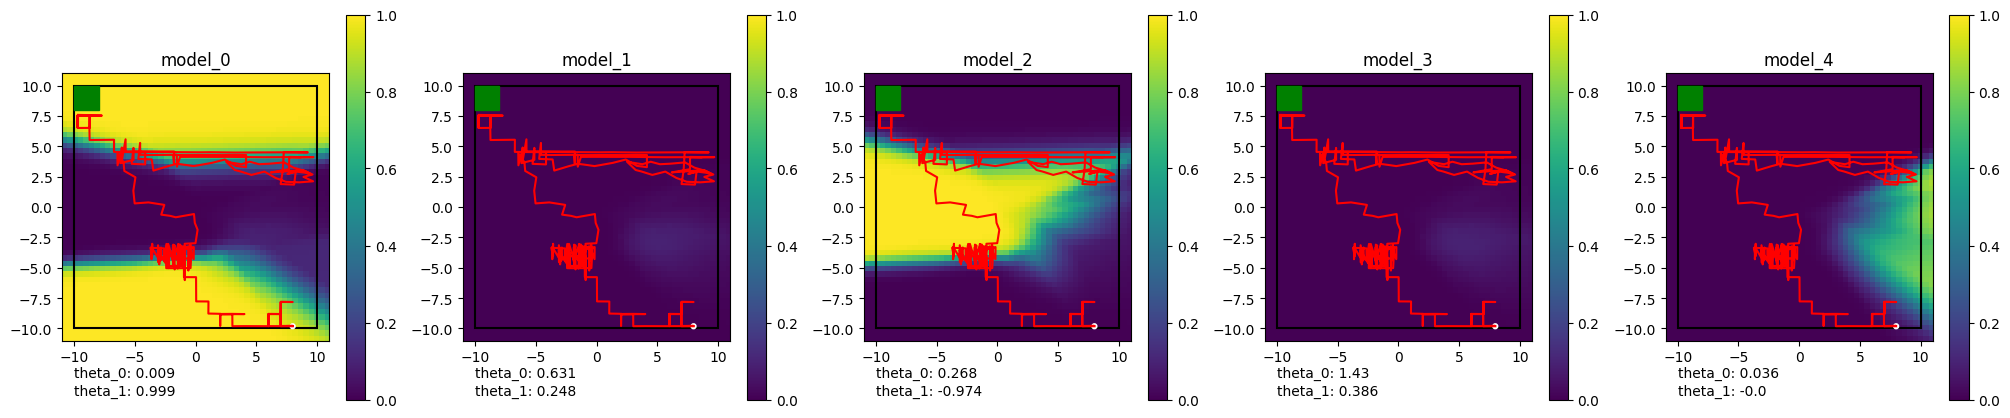

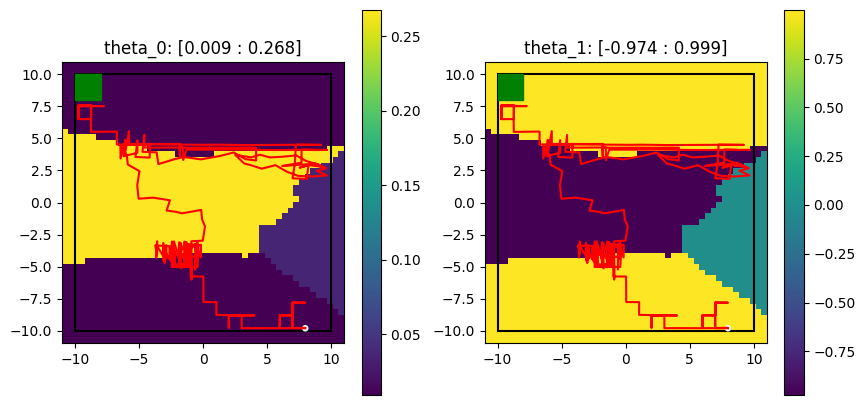

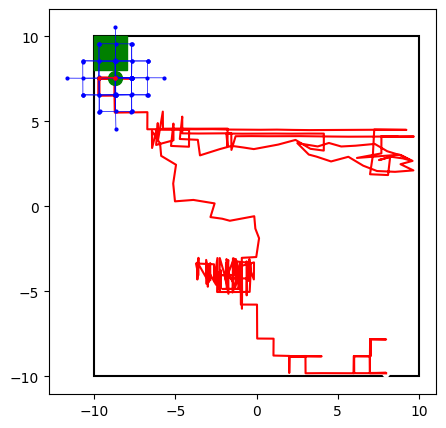

In [5]:
params = {'k':5, "lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=3, model=Model, **params)
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 104


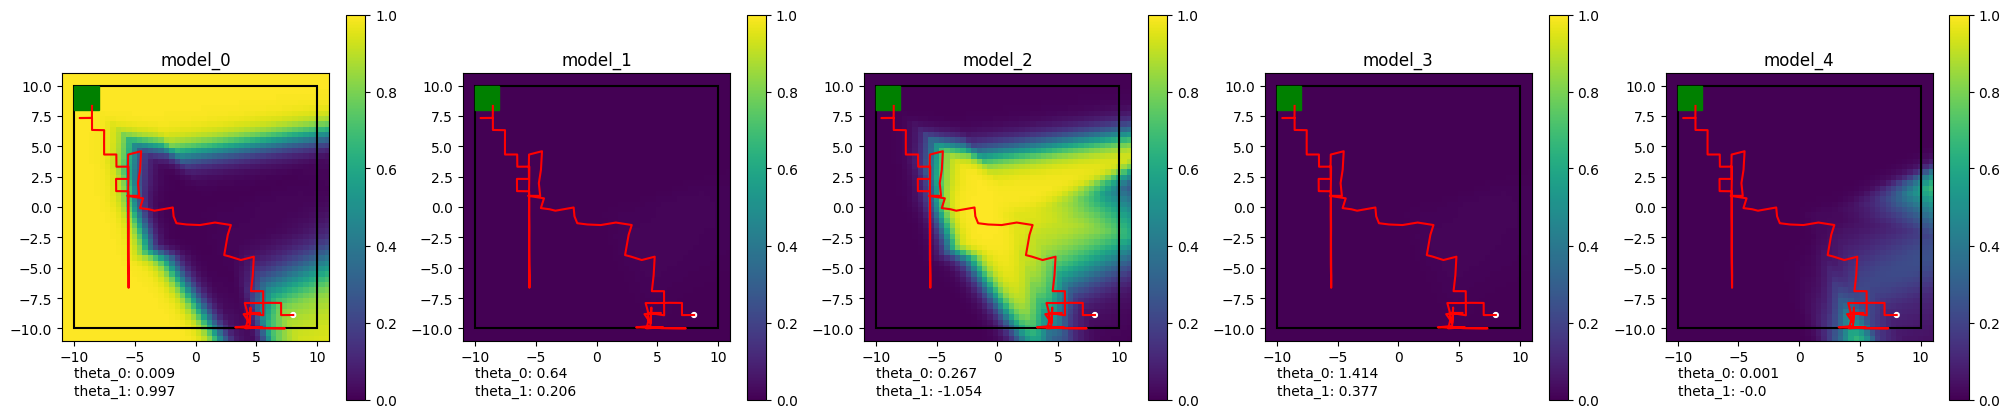

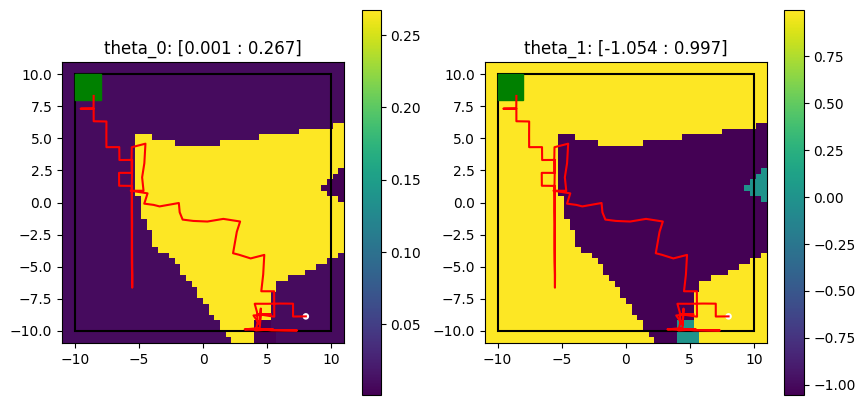

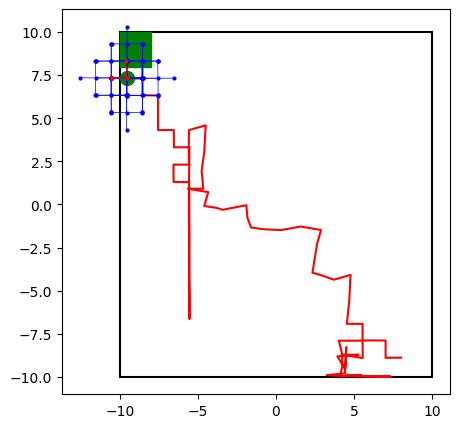

In [7]:
a.env = env2
a.reset()
a.episode(size_limit=300)
a.plot(kind='probs')
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

# General Model

Trajectory size: 170


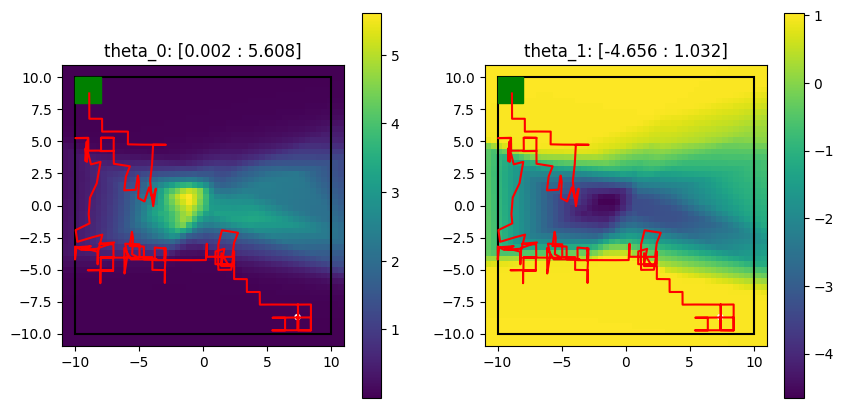

In [9]:
params = {"lr":1e-6, 'momentum':.9}
a = Agent(env, td_model_steps=10, memory_size=0, max_plan_size=3, model=GeneralModel, **params)
a.episode(size_limit=300)
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')

Trajectory size: 300
plan size: 4


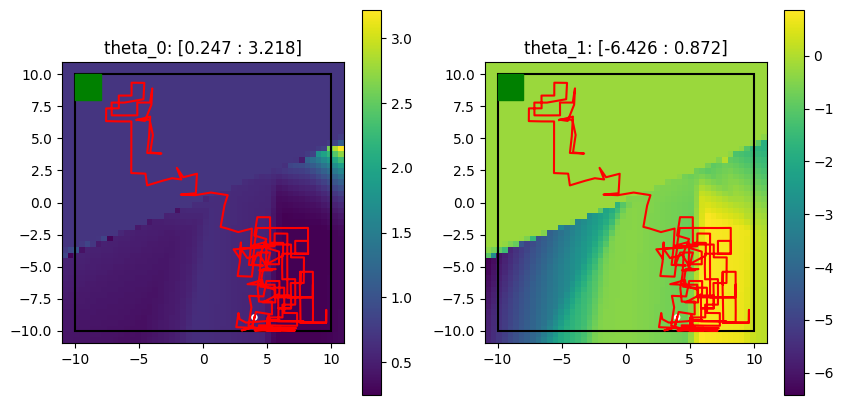

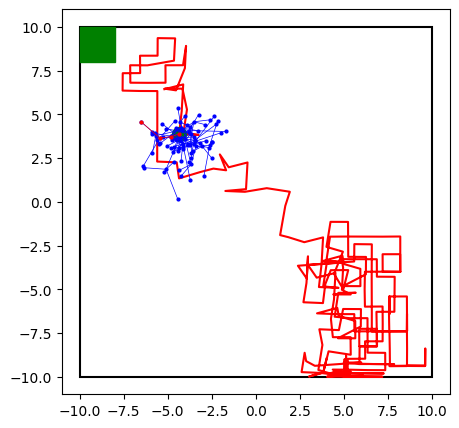

In [10]:
a.env = env2
a.reset()
a.episode(size_limit=300)
a.plot()
a.plot(kind='plan')
print(f'Trajectory size: {a.trajectory.run.shape[0]}')
print(f'plan size: {len(a.plans[0])}')